# Atividade Prática 06

Isabella Menezes Ramos 3474

In [39]:
# Importar as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Ler dados em formato excel

df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx',index_col=False, squeeze=True)

In [3]:
# Filtro para remover quantidade e preço unitário negativos

df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

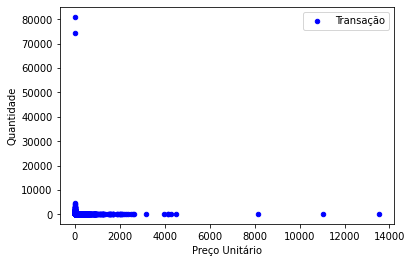

In [4]:
df.plot.scatter(x = 'UnitPrice', y = 'Quantity', color = "blue", label = "Transação")
plt.ylabel("Quantidade")
plt.xlabel("Preço Unitário")
plt.show()

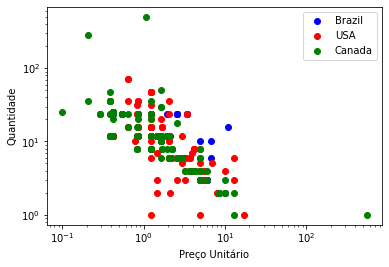

In [5]:
# Colorir por país, a lista de países e cores devem estar no dicionário

colors = {'Brazil':'blue', 'USA':'red', 'Canada':'green'}
fig, ax = plt.subplots()
for country in colors.keys():
    data = df[df['Country'] == country]
    ax.scatter(x = data['UnitPrice'], y = data['Quantity'], c = colors[country], label = country)

plt.ylabel("Quantidade")
plt.xlabel("Preço Unitário")
plt.xscale('log')
plt.yscale('log')
ax.legend()
plt.show()

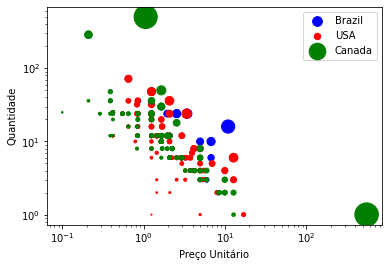

In [6]:
# Colorir por país, a lista de países e cores devem estar no dicionário
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
colors = {'Brazil':'blue', 'USA':'red', 'Canada':'green'}
fig, ax = plt.subplots()
for country in colors.keys():
    data = df[df['Country'] == country]
    ax.scatter(x = data['UnitPrice'], y = data['Quantity'], c = colors[country], label = country, s= data['TotalPrice'])

plt.ylabel("Quantidade")
plt.xlabel("Preço Unitário")
plt.xscale('log')
plt.yscale('log')
ax.legend()
plt.show()

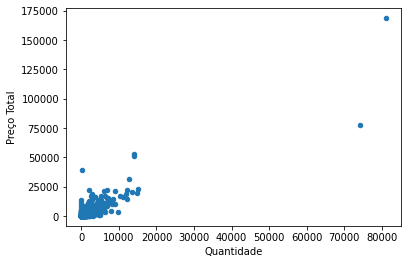

In [7]:
# Calcula o TotalPrice para cada registro

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Agrupa por invoiceNo

group_invoice = df.groupby('InvoiceNo')

#Mostra a relação Quantidade x Total

group_invoice.sum().plot.scatter(x='Quantity', y='TotalPrice')
plt.xlabel("Quantidade")
plt.ylabel("Preço Total")
plt.show()

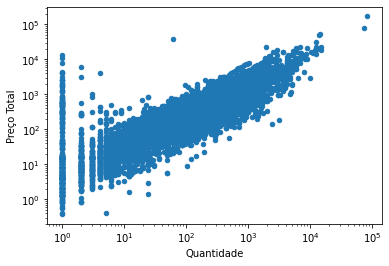

In [9]:
# Mostra a relação Quantidade x Total com ambos eixos na escala log

group_invoice.sum().plot.scatter(x='Quantity', y='TotalPrice')
plt.xlabel("Quantidade")
plt.ylabel("Preço Total")
plt.xscale('log')
plt.yscale('log')
plt.show()

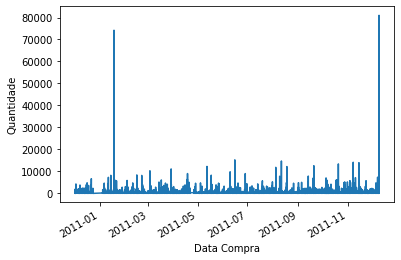

In [10]:
# Agrupa por data

group_date = df.groupby('InvoiceDate')

#Mostra a relação Quantidade x Data

group_date.sum()['Quantity'].plot()
plt.xlabel("Data Compra")
plt.ylabel("Quantidade")
plt.show()

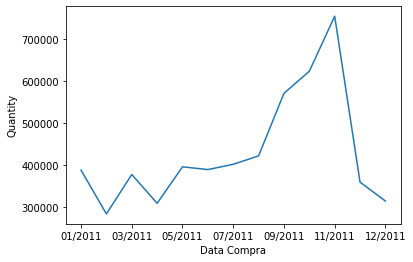

In [11]:
# Cria atributo no formato MES/ANO

df['data_mes_ano'] = df['InvoiceDate'].dt.strftime('%m/%Y')

# Agrupa pelo novo atributo

group_ano_mes = df.groupby('data_mes_ano')
group_ano_mes.sum()['Quantity'].plot()
plt.xlabel('Data Compra')
plt.ylabel('Quantity')
plt.show()

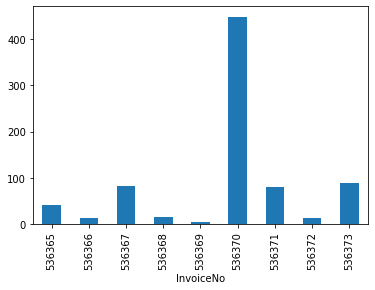

In [12]:
# Filtra os 10 primeiros invoices agrupados, e plota as barras da quantidade


group_invoice = df.groupby("InvoiceNo")
group_invoice.sum().iloc[0:9]['Quantity'].plot(kind='bar')
plt.show()

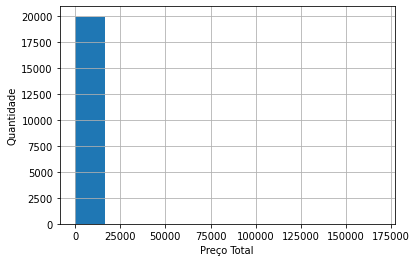

In [13]:
group_invoice = df.groupby("InvoiceNo")
group_invoice.sum()['TotalPrice'].hist()
plt.ylabel('Quantidade')
plt.xlabel('Preço Total')
plt.show()

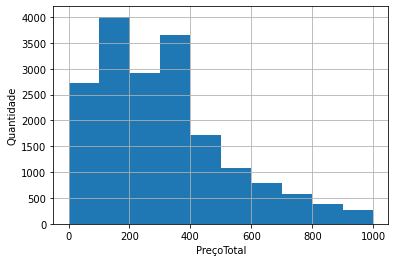

In [15]:
# Filtra TotalPrice < 1000 e faz o histograma

group_invoice = df.groupby("InvoiceNo")
group_invoice.sum().loc[(group_invoice.sum()['TotalPrice'] < 1000)]['TotalPrice'].hist()
plt.ylabel('Quantidade')
plt.xlabel('PreçoTotal')
plt.show()

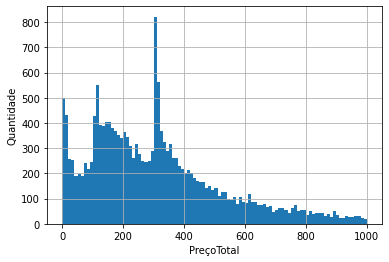

In [16]:
# Filtra TotalPrice < 1000 e faz o histograma, mudando o número de BINS

group_invoice = df.groupby("InvoiceNo")
group_invoice.sum().loc[(group_invoice.sum()['TotalPrice'] < 1000)]['TotalPrice'].hist(bins=100)
plt.ylabel('Quantidade')
plt.xlabel('PreçoTotal')
plt.show()

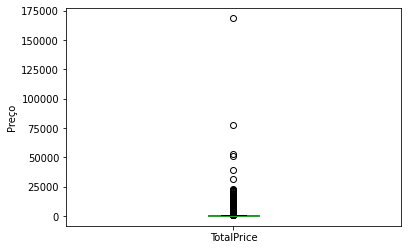

In [17]:
# Boxplot do TotalPrice

group_invoice = df.groupby("InvoiceNo")
group_invoice.sum()['TotalPrice'].plot.box()
plt.ylabel("Preço")
plt.show()

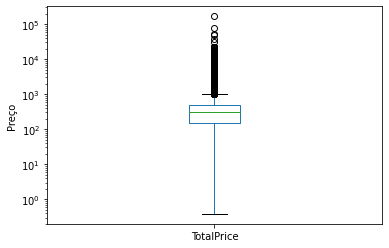

In [18]:
# Boxplot do TotalPrice

group_invoice = df.groupby("InvoiceNo")
group_invoice.sum()['TotalPrice'].plot.box()
plt.ylabel("Preço")
plt.yscale('log')
plt.show()

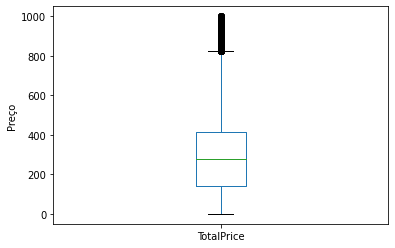

In [19]:
# Boxplot do TotalPrice

group_invoice = df.groupby("InvoiceNo")
group_invoice.sum().loc[(group_invoice.sum()['TotalPrice'] < 1000)]['TotalPrice'].plot.box()
plt.ylabel("Preço")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


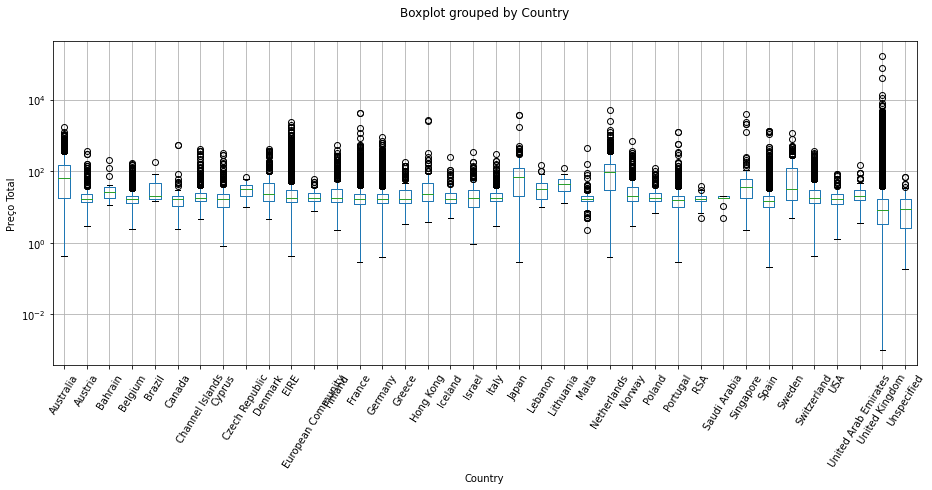

In [20]:
df.boxplot(column='TotalPrice', by='Country', rot=58, figsize=(15,6))
plt.ylabel("Preço Total")
plt.title("")
plt.yscale('log')
plt.show()

# Atividades:

## 1. Faça um gráfico de barras mostrando a quantidade total vendida de cada um dos 10 primeiros produtos que aparecem no Dataframe.


In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


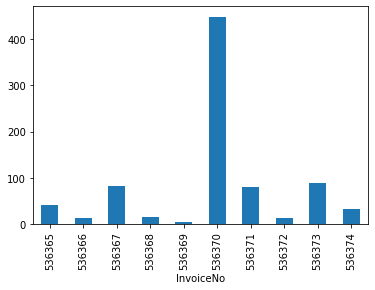

In [6]:
group_invoice = df.groupby('InvoiceNo')
group_invoice.sum().iloc[0:10]['Quantity'].plot(kind='bar')
plt.show()


## 2. Faça um Boxplot dos preços unitários dos produtos. Considere somente os 10 produtos mais vendidos.

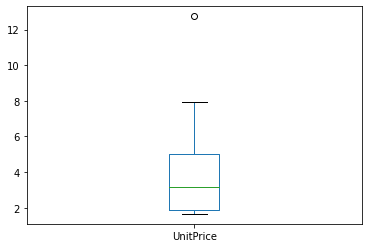

In [18]:
mais_vendidos =  df.groupby('InvoiceNo')['Quantity'].sum().sort_values(ascending=False).head(10)
df.loc[mais_vendidos]['UnitPrice'].plot.box()
plt.show()

## 3. Faça um gráfico de linhas mostrando o faturamento (total de preços das vendas) por dia

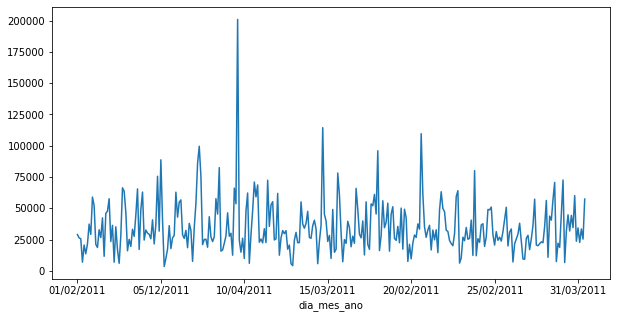

In [36]:
df['dia_mes_ano'] = df['InvoiceDate'].dt.strftime('%d/%m/%Y')
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.groupby('dia_mes_ano')['TotalPrice'].sum().plot()
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

## 4. Faça o histograma da média dos preços unitários dos produtos.


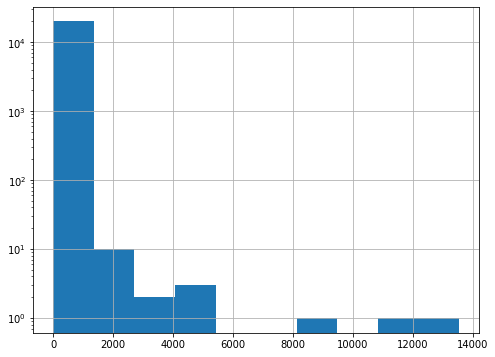

In [49]:
df.groupby('InvoiceNo')['UnitPrice'].mean().hist()
plt.rcParams["figure.figsize"] = (87,6)
plt.yscale('log')
plt.show()

## 5. Faça dois gráficos de barras, sendo um da quantidade de compras e outro do total de faturamento por país.

In [62]:
plt.rcParams['figure.figsize'] = (10,5)

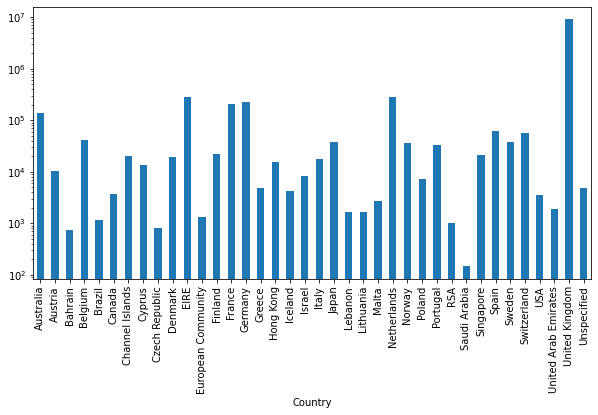

In [63]:
df.groupby('Country')['Quantity'].sum().plot(kind='bar')
plt.yscale('log')
plt.show()

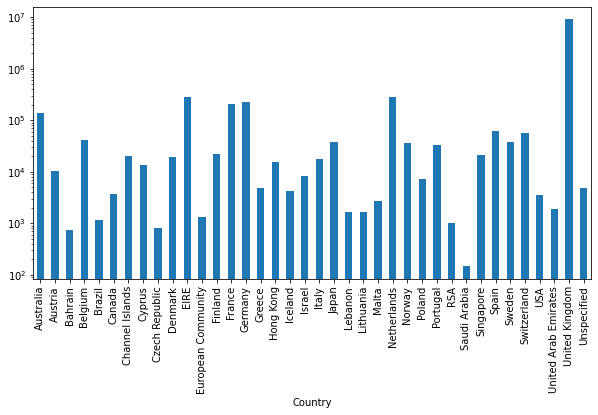

In [64]:
df.groupby('Country')['TotalPrice'].sum().plot(kind='bar')
plt.yscale('log')
plt.show()

## 6. Considerando os 100 produtos mais vendidos, é possível visualizar alguma diferença entre a distribuição dos preços unitários desses produtos ao se comparar os países “Australia” e “United Kingdom”? Faça um ou mais gráficos para ajudar a responder.

Podemos analisar que a Austrália não aparece nos cem produtos mais vendidos, há uma grande diferença entre os preços dos produtos como podemos observar nos gráficos abaixo, sendo assim não podemos responder a questão levando em conta apenas os cem produtos mais vendidos. Apenas United Kingdom aparece no ranking,

Quantity
3600.0     AxesSubplot(0.125,0.125;0.775x0.755)
3689.0     AxesSubplot(0.125,0.125;0.775x0.755)
3714.0     AxesSubplot(0.125,0.125;0.775x0.755)
3944.0     AxesSubplot(0.125,0.125;0.775x0.755)
4280.0     AxesSubplot(0.125,0.125;0.775x0.755)
4510.0     AxesSubplot(0.125,0.125;0.775x0.755)
4662.0     AxesSubplot(0.125,0.125;0.775x0.755)
4800.0     AxesSubplot(0.125,0.125;0.775x0.755)
5730.0     AxesSubplot(0.125,0.125;0.775x0.755)
6072.0     AxesSubplot(0.125,0.125;0.775x0.755)
6198.0     AxesSubplot(0.125,0.125;0.775x0.755)
6668.0     AxesSubplot(0.125,0.125;0.775x0.755)
7044.0     AxesSubplot(0.125,0.125;0.775x0.755)
8210.0     AxesSubplot(0.125,0.125;0.775x0.755)
74215.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Country, dtype: object

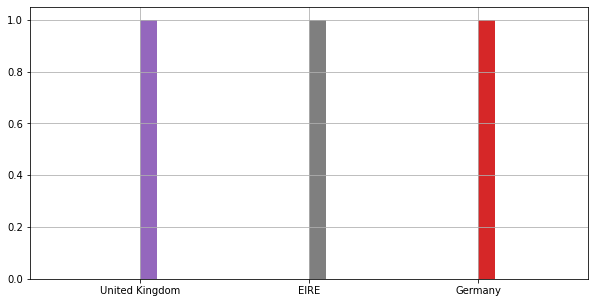

In [93]:
mais_vendidos =  df.groupby('InvoiceNo')['Quantity'].sum().sort_values(ascending=False).head(100)
df.groupby(mais_vendidos)['Country'].hist()

In [100]:
a = df[df['Country'] == 'Australia']['Quantity'].sort_values(ascending=False).head(100)
b = df[df['Country'] == 'United Kingdom']['Quantity'].sort_values(ascending=False).head(100)

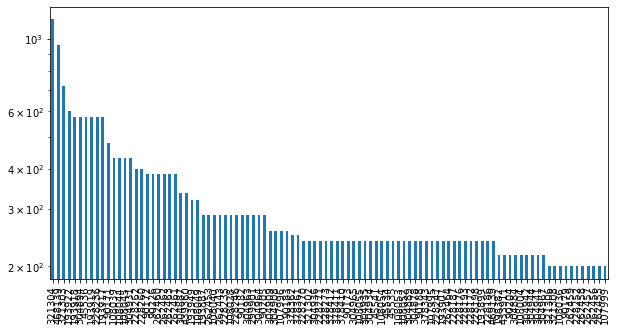

In [106]:
a.plot(kind='bar')
plt.yscale('log')
plt.show()

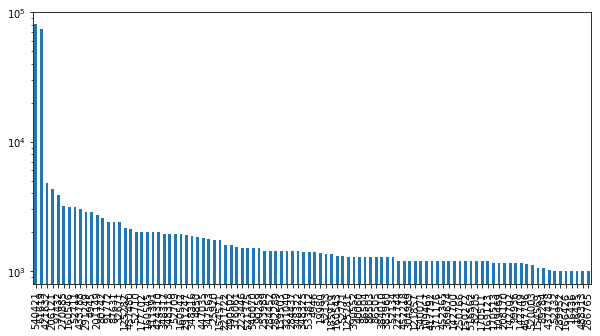

In [107]:
b.plot(kind='bar')
plt.yscale('log')
plt.show()